# Scikit Learn

In [52]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

In [40]:
X,y = load_breast_cancer(return_X_y= True) 

## Loading a Model 

In [41]:
from sklearn.neighbors import KNeighborsRegressor


### Initializing a object 

In [42]:
mod = KNeighborsRegressor()


# mod = LinearRegression()

In [43]:
mod.fit(X,y)

KNeighborsRegressor()

In [44]:
pred = mod.predict(X)

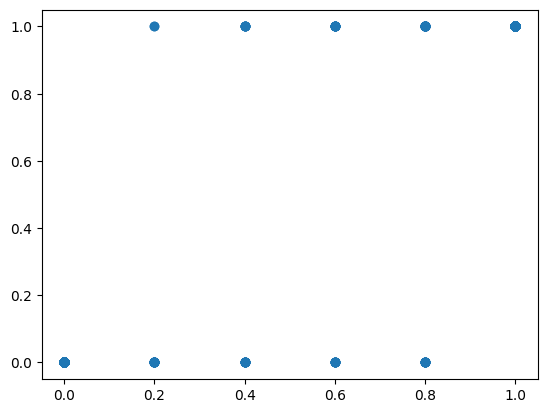

In [45]:
plt.scatter(pred , y) 

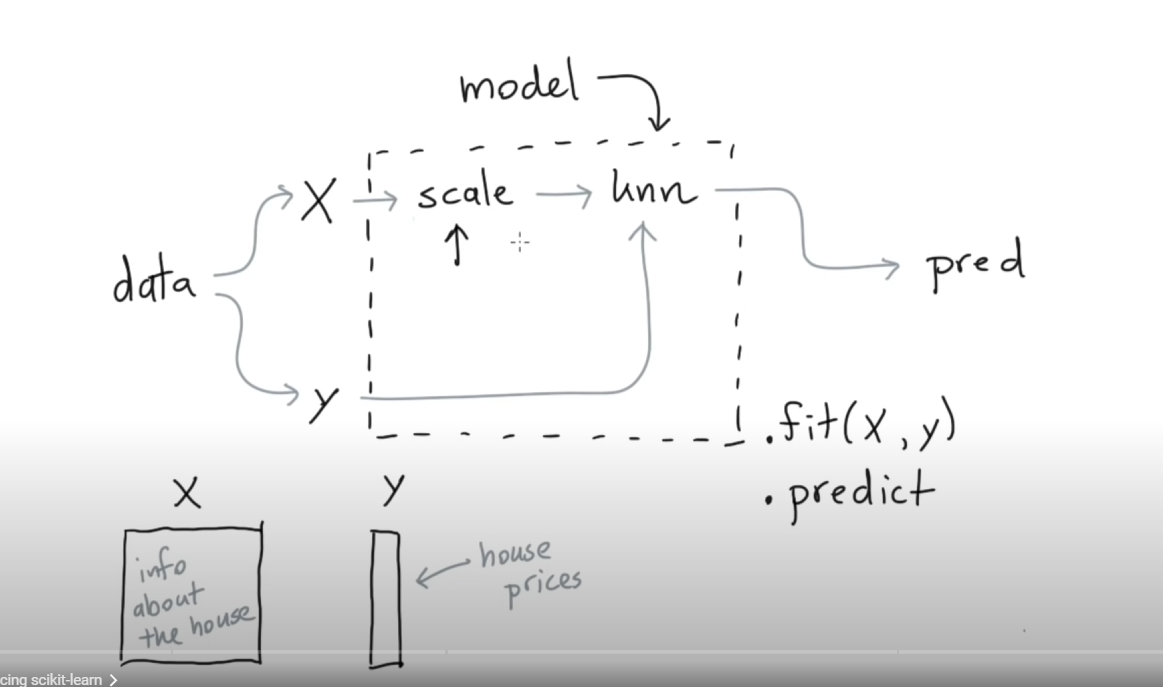

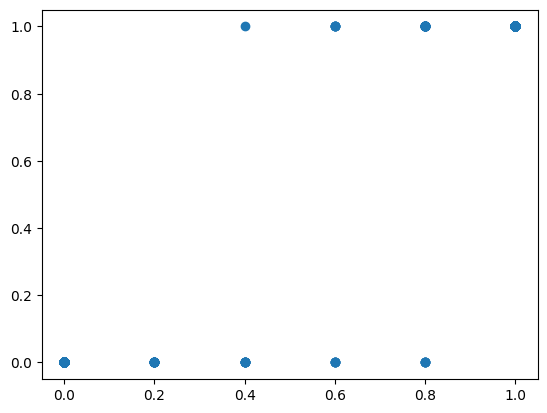

In [46]:
from sklearn.linear_model import LinearRegression

pipe = Pipeline(
    [
        ('scale', StandardScaler()),
        ("model", KNeighborsRegressor())
    ]
)
pipe.fit(X,y)
new_pred = pipe.predict(X)
plt.scatter(new_pred, y)

# Methods of refining the prediction :: gridSearchCV
1. Increasing number of neighbours 
2. Using Different parts of datasets to predict 

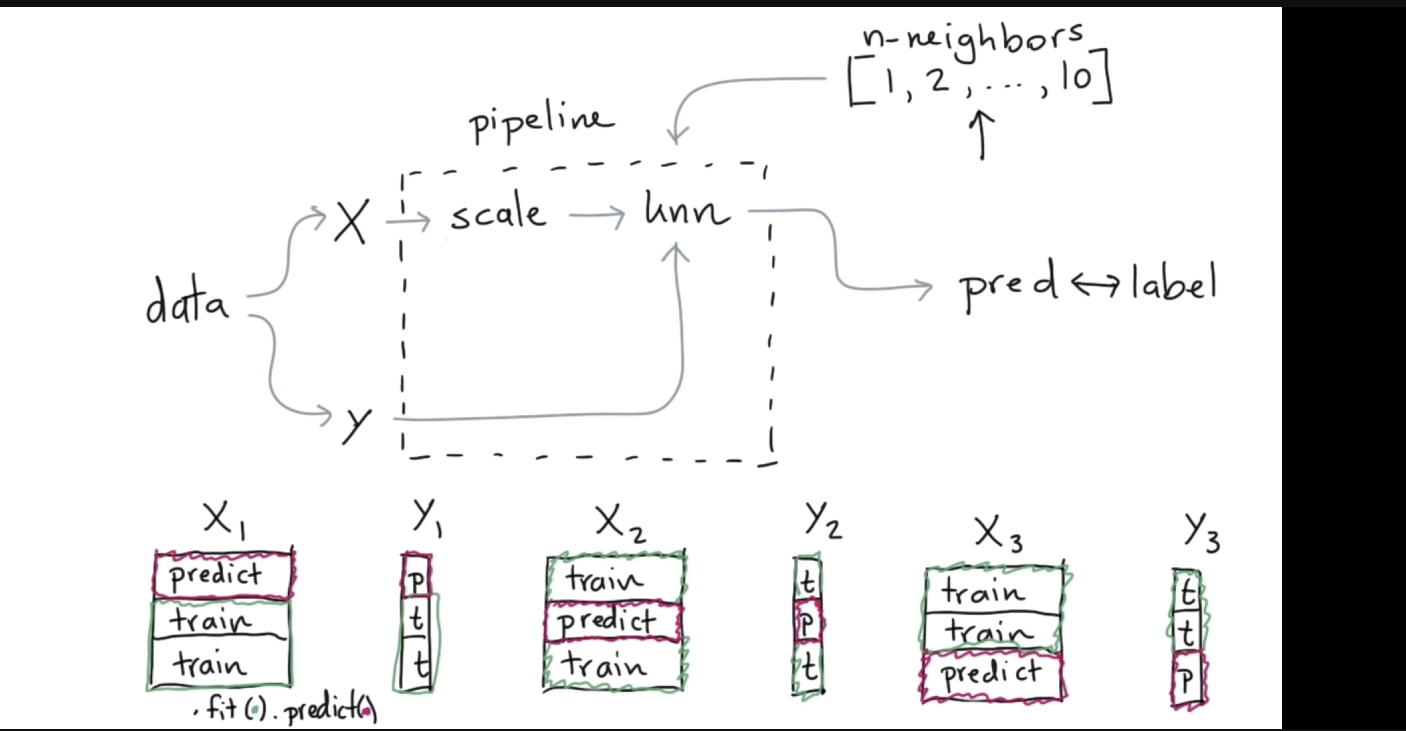

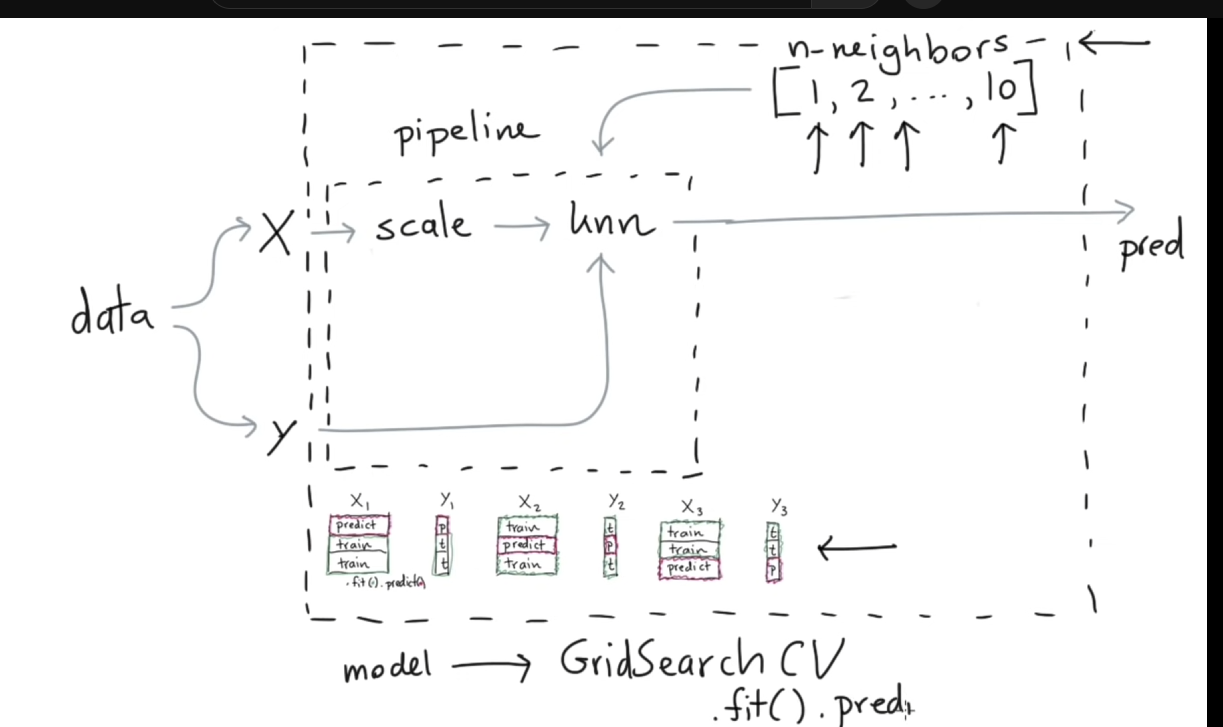

In [49]:
from sklearn.model_selection import GridSearchCV
pipe.get_params() # all the settings i am able to tweek

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [50]:
mod = GridSearchCV(estimator= pipe,
             param_grid = { 'model__n_neighbors' :  [1,2,3,4,5,6,7,8,9,10]},
             cv = 3 # CrossValidation Parameter (no. of time the data sets used to predict something) 
             )

In [53]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003339,0.000478,0.021002,0.004082,1,{'model__n_neighbors': 1},0.831504,0.798729,0.668844,0.766359,0.070240,10
1,0.001661,0.000477,0.013001,0.002957,2,{'model__n_neighbors': 2},0.836770,0.877001,0.774212,0.829327,0.042292,9
2,0.001334,0.000457,0.008328,0.000949,3,{'model__n_neighbors': 3},0.810442,0.903092,0.819369,0.844301,0.041731,4
3,0.001006,0.000010,0.009004,0.000008,4,{'model__n_neighbors': 4},0.802544,0.886785,0.847593,0.845641,0.034419,2
4,0.000997,0.000016,0.010329,0.001246,5,{'model__n_neighbors': 5},0.785168,0.902495,0.861516,0.849727,0.048619,1
5,0.001324,0.000478,0.010684,0.000473,6,{'model__n_neighbors': 6},0.772999,0.897501,0.866199,0.845566,0.052880,3
6,0.001007,0.000009,0.008993,0.000021,7,{'model__n_neighbors': 7},0.777775,0.892747,0.861148,0.843890,0.048498,5
7,0.001003,0.000009,0.009328,0.000476,8,{'model__n_neighbors': 8},0.756471,0.888532,0.871112,0.838705,0.058582,6
8,0.001003,0.000011,0.009343,0.000462,9,{'model__n_neighbors': 9},0.749857,0.894809,0.851333,0.831999,0.060735,7
9,0.000988,0.000006,0.008838,0.000633,10,{'model__n_neighbors': 10},0.741148,0.896681,0.852786,0.830205,0.065473,8


In [56]:
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 